#pertama melakukan Import Dataset

In [ ]:
!wget --no-check-certificate \
   https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip

--2024-06-28 14:08:00--  https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ai4i+2020+predictive+maintenance+dataset.zip.1’

ai4i+2020+predictiv     [ <=>                ] 509.93K  3.08MB/s    in 0.2s    

2024-06-28 14:08:00 (3.08 MB/s) - ‘ai4i+2020+predictive+maintenance+dataset.zip.1’ saved [522170]



#lalu melakukan Install library yang akan kita gunakan

In [ ]:
!pip install -U pandas-profiling --quiet

#lalu melakukan Import Library sesuai yang kita gunakan dan juga yang tadi kita install

In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import math
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
import ydata_profiling as pdpf

In [ ]:
local_zip = '/content/ai4i+2020+predictive+maintenance+dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'maintenance')

In [ ]:
df = pd.read_csv('/content/ai4i2020.csv')

#setelah itu kita masuk kedalam Data Preprocessing

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
#Hapus kolom yang tidak kita butuhkan dan  individual failure
df.drop(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'], axis=1, inplace = True)

In [ ]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [ ]:
df.shape

(10000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
#Menyederhanakan nama kolom data agar lebih mudah
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [ ]:
#Mencari standard deviasi, rata rata dan lain sebagainya
numeric = df.select_dtypes(include = [np.int64, np.float64])
numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Mencari nilai unik dari kolom kategorikal yang ada
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}: {df[col].unique()}")

Type: ['M' 'L' 'H']


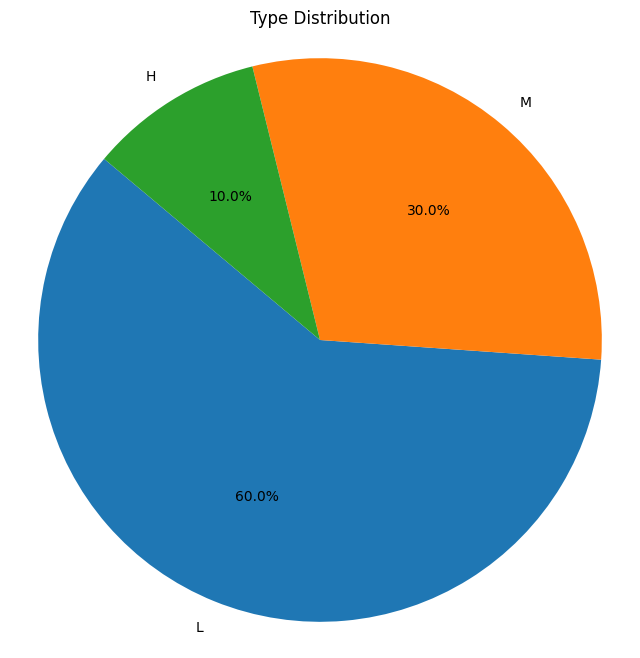

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Type Distribution')
plt.show()

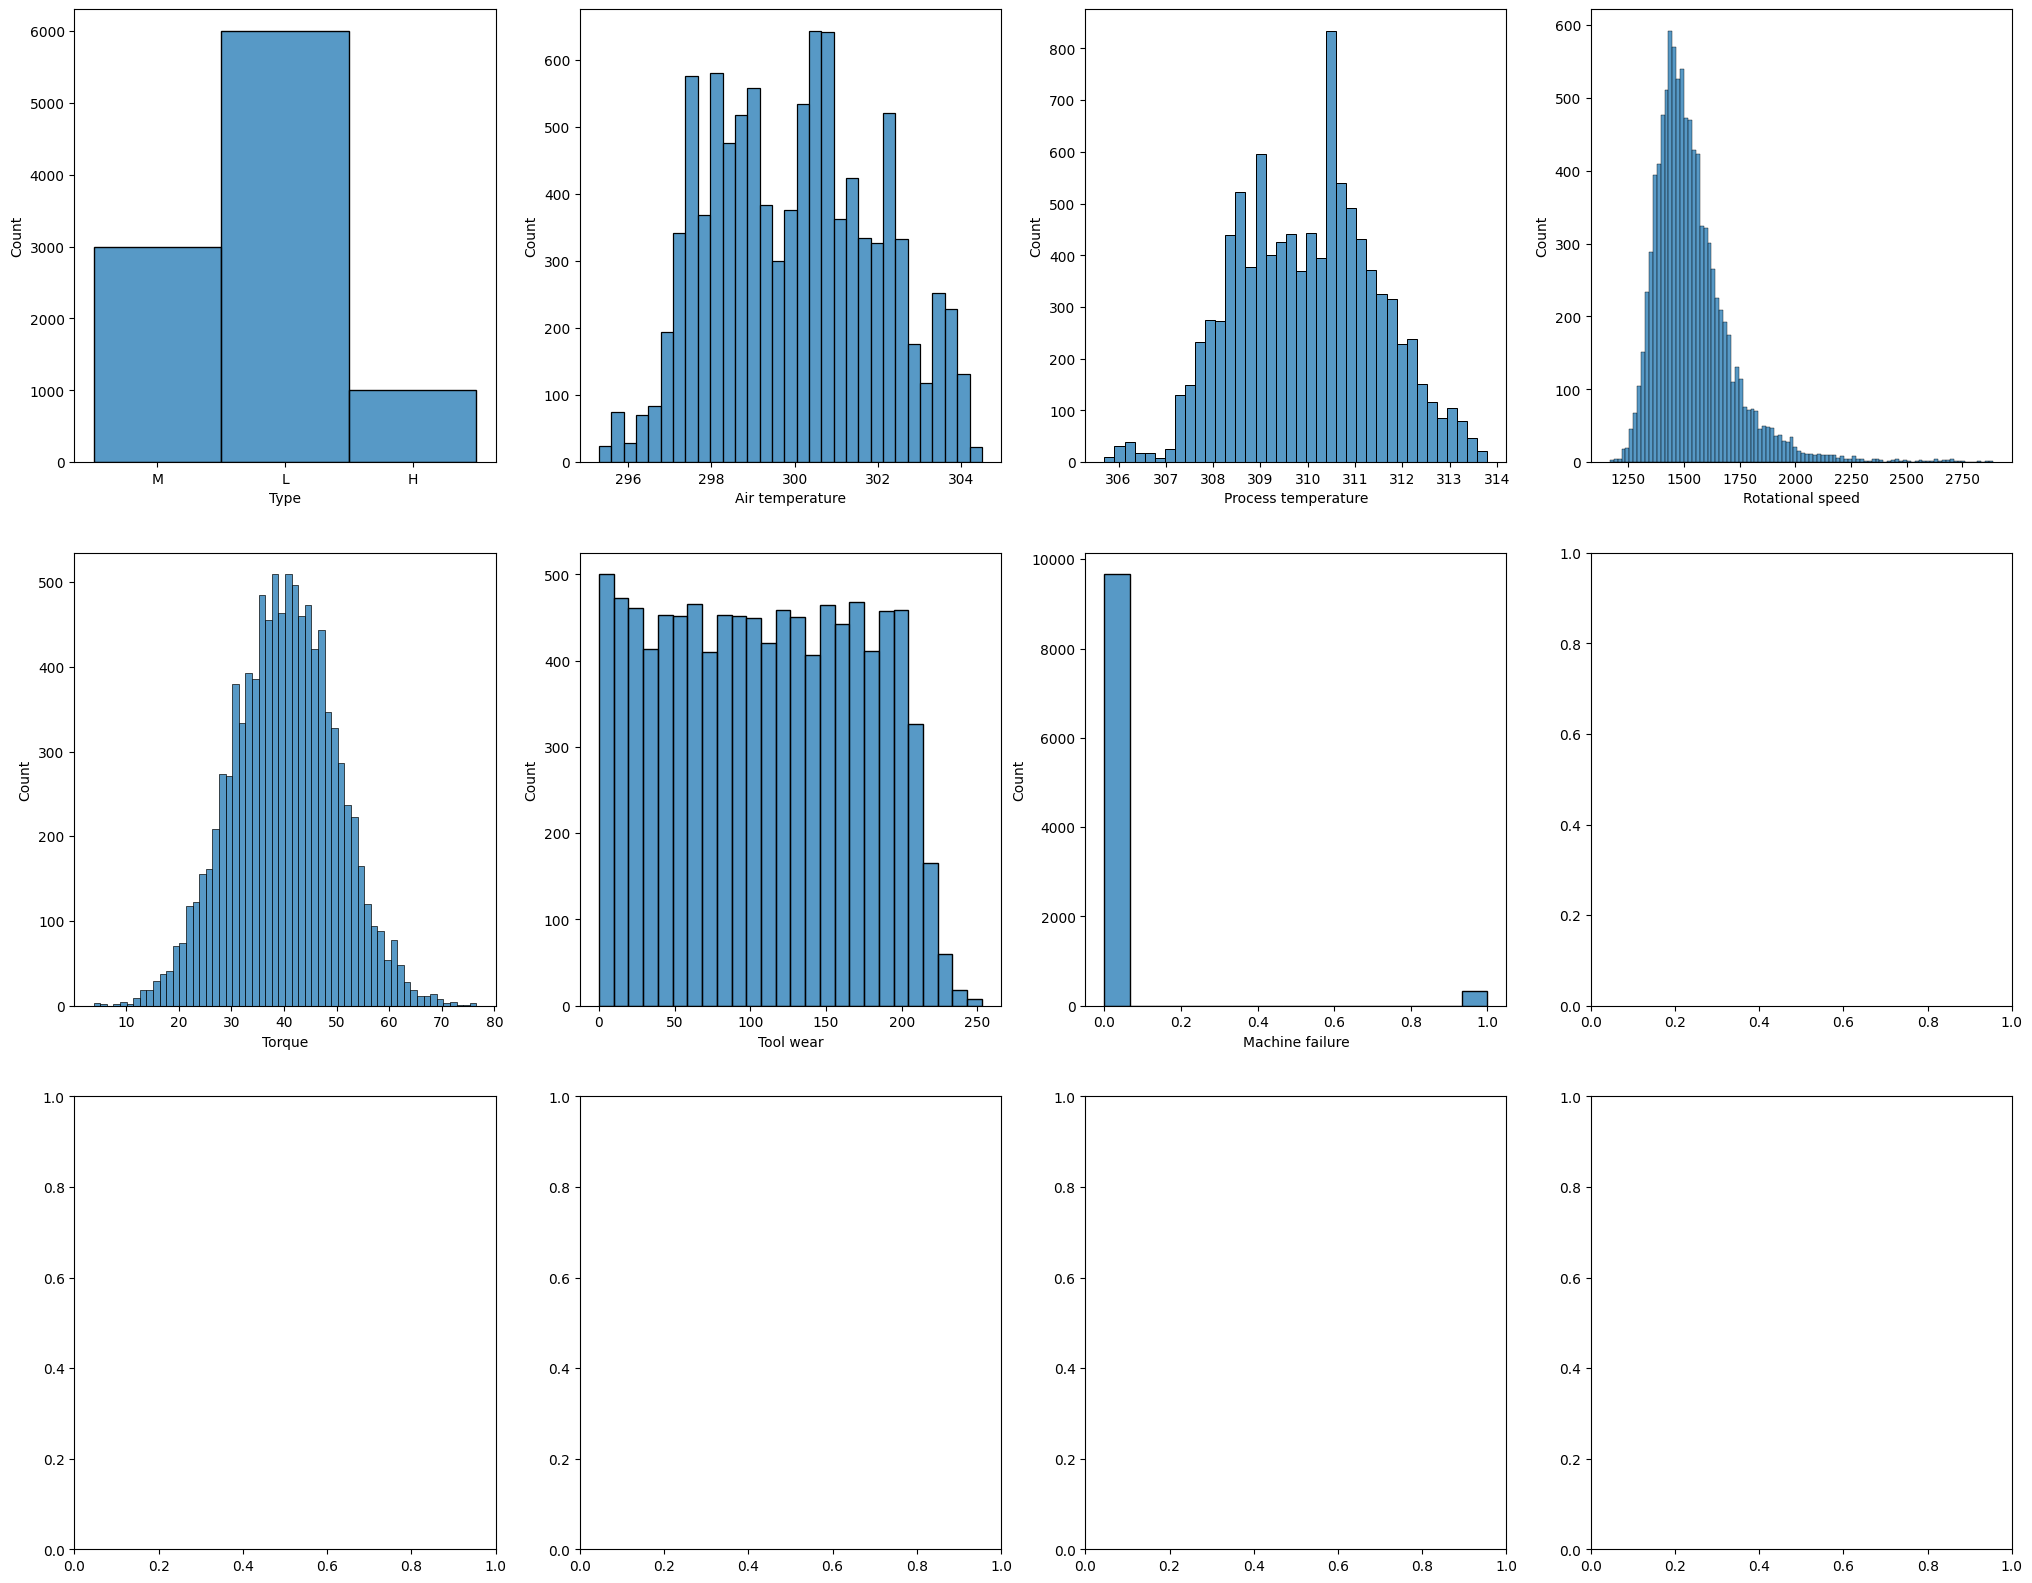

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

#selanjutnya masuk ke dalam tahap Label Encoding

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col] = label_encoder.transform(df[col])
  print(f"{col}: {df[col].unique()}")

Type: [2 1 0]


In [ ]:
#Ubah semua kolom menjadi float agar dapat diolah oleh model
for column in df.columns:
    df[column] = df[column].astype(float)

In [ ]:
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
dtype: object

#langkah selanjutnya kita melakukan Handling Outliers

In [ ]:
excluded_columns = ['Type', 'Machine failure']
for col in df.columns:
      if col not in excluded_columns:
        df[col] = zscore(df[col])

#setelah melakukan hal tersebut kita masuk ke dalam pembuatan Correlation Table and Heatmap

In [ ]:
df.corr()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
Type,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152
Air temperature,0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature,0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed,-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear,-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


<Axes: >

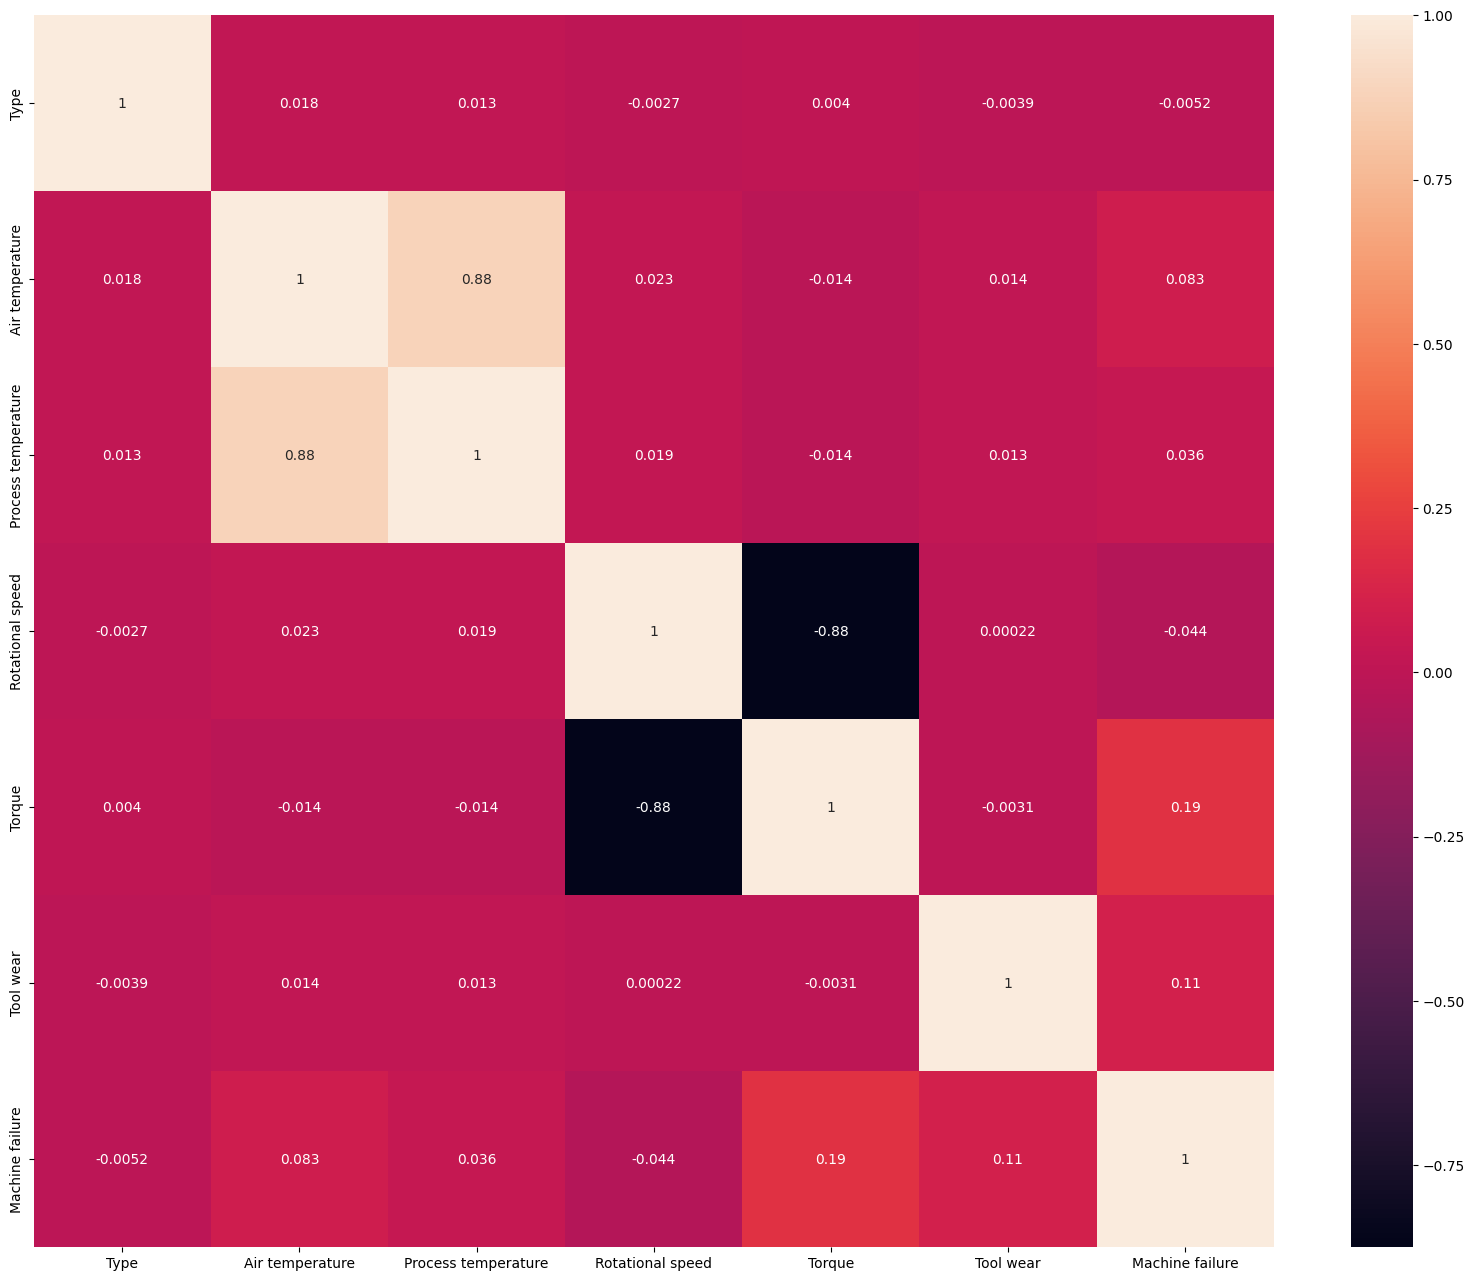

In [ ]:
#Correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot = True)

In [ ]:
df_profile = pdpf.ProfileReport(df, dark_mode=True)
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#setelah itu masuk ke dalam Train Test Split yang berguna untuk membagi dataset menjadi dua bagian untuk melatih model dan menguji performanya guna mencegah overfitting dan memastikan validitas model.

In [ ]:
X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify = y)

#Standard Scaler




In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#setelah melakukan standard scaler kita dapa melakukan Building Model

In [ ]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 5)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:
y_train_pred=model.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
mae_train = metrics.mean_absolute_error(y_train_pred, y_train)
mse_train = metrics.mean_squared_error(y_train_pred, y_train)
rmse_train = math.sqrt(mse_train)

print("Accuracy on Training Set: {:.2f}%".format(accuracy_train * 100))
print("MAE is {:.2f}%".format(mae_train* 100))
print("MSE is {:.2f}%".format(mse_train* 100))
print("RMSE is {:.2f}%".format(rmse_train* 100))

Accuracy on Training Set: 99.29%
MAE is 0.71%
MSE is 0.71%
RMSE is 8.41%


In [ ]:
y_test_pred = model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test_pred, y_test)
mae_test = metrics.mean_absolute_error(y_test_pred, y_test)
mse_test = metrics.mean_squared_error(y_test_pred, y_test)
rmse_test = math.sqrt(mse_test)

print("Accuracy on Testing Set: {:.2f}%".format(accuracy_test* 100))
print("MAE is {:.2f}%".format(mae_test* 100))
print("MSE is {:.2f}%".format(mse_test* 100))
print("RMSE is {:.2f}%".format(rmse_test* 100))

Accuracy on Testing Set: 98.16%
MAE is 1.84%
MSE is 1.84%
RMSE is 13.56%
